# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [1]:
using Clustering, CSV, DataFrames

## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")
first(data, 5)

5×2 DataFrame
│ Row │ x      │ y      │
│     │ Int64  │ Int64  │
├─────┼────────┼────────┤
│ 1   │ 664159 │ 550946 │
│ 2   │ 665845 │ 557965 │
│ 3   │ 597173 │ 575538 │
│ 4   │ 618600 │ 551446 │
│ 5   │ 635690 │ 608046 │

In [3]:
X = Matrix(data[:, 1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [4]:
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([320602.55 417799.6942675159 … 337264.7629179331 507818.3133903134; 161521.85 787001.9936305733 … 562123.3799392097 175610.41595441595], [9, 9, 9, 9, 9, 9, 9, 9, 9, 9  …  5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [3.868603093541992e9, 3.784863740838379e9, 8.956930531298828e7, 6.740235058618164e8, 1.976029744717041e9, 6.258253758146973e8, 1.402054662494873e9, 3.6132858852539062e6, 4.345366158831543e9, 3.3965333364257812e6  …  2.782454939169922e8, 5.595652414916992e9, 2.9773947540195312e9, 1.2777467247363281e8, 4.674976160428711e9, 1.0817732159863281e8, 4.381570026557617e8, 4.130407882919922e8, 5.097647169803223e9, 5.81265660621582e8], [340, 314, 336, 327, 352, 345, 350, 349, 297, 316, 319, 334, 341, 329, 351], [340, 314, 336, 327, 352, 345, 350, 349, 297, 316, 319, 334, 341, 329, 351], 8.917659579893688e12, 4, true)

In [5]:
data[!,:cluster] = string.(assignments(result));
first(data,5)

5×3 DataFrame
│ Row │ x      │ y      │ cluster │
│     │ Int64  │ Int64  │ String  │
├─────┼────────┼────────┼─────────┤
│ 1   │ 664159 │ 550946 │ 9       │
│ 2   │ 665845 │ 557965 │ 9       │
│ 3   │ 597173 │ 575538 │ 9       │
│ 4   │ 618600 │ 551446 │ 9       │
│ 5   │ 635690 │ 608046 │ 9       │

In [6]:
result.centers

2×15 Array{Float64,2}:
 3.20603e5       4.178e5  6.17602e5  8.52058e5  …  3.37265e5  5.07818e5
 1.61522e5  787002.0      3.99504e5  1.57686e5     5.62123e5  1.7561e5 

In [7]:
using Gadfly

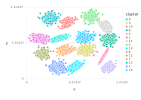

In [8]:
plot(data, x="x", y="y", color="cluster", Geom.point)